In [13]:
# imports
#!pip install pandas
import sys
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
DIR = "/home/jupyter-user-1/shared_data_read_only/Census-Data/"

In [15]:
metadata = pd.read_csv(DIR + "ACSST5Y2022.S2201-Column-Metadata.csv")
data = pd.read_csv(DIR + "ACSST5Y2022.S2201-Data.csv")

/tmp/ipykernel_36401/357138902.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,70,71,72,73,74,75,76,77,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,222,223,224,225,226,227,228,229,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,374,375,376,377,378,379,380,381) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DIR + "ACSST5Y2022.S2201-Data.csv")


In [16]:
data.head()
x = data.iloc[:1]
x

,GEO_ID,NAME,S2201_C01_001E,S2201_C01_001M,S2201_C01_002E,S2201_C01_002M,S2201_C01_003E,S2201_C01_003M,S2201_C01_004E,S2201_C01_004M,...,S2201_C06_034M,S2201_C06_035E,S2201_C06_035M,S2201_C06_036E,S2201_C06_036M,S2201_C06_037E,S2201_C06_037M,S2201_C06_038E,S2201_C06_038M,Unnamed: 458
0,Geography,Geographic Area Name,Estimate!!Total!!Households,Margin of Error!!Total!!Households,Estimate!!Total!!Households!!With one or more ...,Margin of Error!!Total!!Households!!With one o...,Estimate!!Total!!Households!!No people in the ...,Margin of Error!!Total!!Households!!No people ...,Estimate!!Total!!Households!!Married-couple fa...,Margin of Error!!Total!!Households!!Married-co...,...,Margin of Error!!Percent households not receiv...,Estimate!!Percent households not receiving foo...,Margin of Error!!Percent households not receiv...,Estimate!!Percent households not receiving foo...,Margin of Error!!Percent households not receiv...,Estimate!!Percent households not receiving foo...,Margin of Error!!Percent households not receiv...,Estimate!!Percent households not receiving foo...,Margin of Error!!Percent households not receiv...,NaN


In [17]:
new_df = data[['GEO_ID', 'NAME']].copy()


In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85397 entries, 0 to 85396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   GEO_ID  85397 non-null  object
 1   NAME    85397 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [19]:
def process_label(label, phrases):
    '''
    Takes in a column and a list of strings,
    filtering the column if any string from phrases
    is present
    '''
    if pd.isnull(label):
        return None
    for phrase in phrases:
        if phrase in label:
            return phrase
    return None

In [20]:
data_phrases = [
    "With children under 18 years",
    "Below poverty level",
    "Black or African American"
]

In [21]:
metadata['Label'] = metadata['Label'].apply(process_label, phrases = data_phrases)
metadata.dropna(subset=['Label'], inplace=True)
metadata.reset_index(drop=True, inplace=True)

In [22]:
to_keep = [x for x in list(data.iloc[0].values) if ('With children under 18 years' in str(x)) |
 ('Below poverty level' in str(x)) |
 ('Black or African American' in str(x))
]

columns = data.iloc[0].reset_index()
columns.columns = ['index','target']

final_columns = columns.loc[columns['target'].isin(to_keep)]

data = data[final_columns['index']]
data.insert
data.head()
combined_df = pd.concat([new_df, data], axis = 1)
filtered_df = combined_df[combined_df['NAME'].str.contains('Philadelphia')]
filtered_df.head()

,GEO_ID,NAME,S2201_C01_009E,S2201_C01_009M,S2201_C01_010E,S2201_C01_010M,S2201_C01_011E,S2201_C01_011M,S2201_C01_012E,S2201_C01_012M,...,S2201_C06_012E,S2201_C06_012M,S2201_C06_013E,S2201_C06_013M,S2201_C06_014E,S2201_C06_014M,S2201_C06_021E,S2201_C06_021M,S2201_C06_026E,S2201_C06_026M
65977,1400000US42101000101,Census Tract 1.01; Philadelphia County; Pennsy...,34,41,34,41,0,11,0,11,...,0.0,2.1,0.0,2.1,0.0,2.1,1.0,1.6,1.1,1.8
65978,1400000US42101000102,Census Tract 1.02; Philadelphia County; Pennsy...,91,91,91,91,0,11,0,11,...,0.0,1.5,0.0,1.5,0.0,1.5,7.3,4.1,3.4,3.2
65979,1400000US42101000200,Census Tract 2; Philadelphia County; Pennsylvania,283,112,161,62,122,100,59,71,...,3.9,4.8,0.7,1.2,0.0,2.0,12.5,7.2,0.0,2.0
65980,1400000US42101000300,Census Tract 3; Philadelphia County; Pennsylvania,171,90,160,89,11,16,0,11,...,0.0,1.3,0.5,0.7,0.0,1.3,5.6,3.2,9.6,6.0
65981,1400000US42101000401,Census Tract 4.01; Philadelphia County; Pennsy...,42,31,33,28,9,15,0,11,...,0.0,1.7,0.0,1.7,0.0,1.7,11.2,5.5,19.8,12.6


In [23]:
df = pd.read_csv('../data_forgood.csv')

x = df['Tract'].values.tolist()
y = []
for i in x:
    i = str(i)
    if i[-2:] == ".0":
        y.append(i[:-2])
    else:
        y.append(i)
print(y)

['268', '270', '276', '277', '278', '279.01', '279.02', '280', '281', '282', '283', '284', '55', '60', '61', '62', '63', '64', '65', '66', '67', '65', '66', '67', '70', '71.01', '71.02', '72', '73', '74', '77', '78', '79', '80', '81.01', '81.02', '82', '83.01', '83.02', '84', '85', '86.01', '391', '205', '206', '208', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '252', '279.02', '280', '389', '9801', '30.01', '30.02', '31', '32', '33', '36', '37.01', '37.02', '38', '39.01', '39.02', '373', '9809.04', '12.01', '12.03', '12.04', '13.01', '13.02', '14', '19', '20', '21', '22', '30.02', '31', '32', '33', '9809.03', '10.01', '10.02', '11.01', '11.02', '15', '16', '17', '18', '23', '24', '25', '27.01', '27.02', '28.01', '28.02', '29', '366', '27.01', '27.02', '28.01', '28.02', '29', '40.01', '40.02', '41.01', '41.03', '41.04', '42.01', '42.02', '372', '373', '9806', '9807.02', '309', '310', '311.01', '311.02', '312', '313', '314.01', '314.

In [24]:
df = pd.read_csv('../data_forgood.csv')

x = df['Tract'].values.tolist()
y = []
for i in x:
    i = str(i)
    if i[-2:] == ".0":
        y.append(i[:-2])
    else:
        y.append(i)
print(y)

['268', '270', '276', '277', '278', '279.01', '279.02', '280', '281', '282', '283', '284', '55', '60', '61', '62', '63', '64', '65', '66', '67', '65', '66', '67', '70', '71.01', '71.02', '72', '73', '74', '77', '78', '79', '80', '81.01', '81.02', '82', '83.01', '83.02', '84', '85', '86.01', '391', '205', '206', '208', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '252', '279.02', '280', '389', '9801', '30.01', '30.02', '31', '32', '33', '36', '37.01', '37.02', '38', '39.01', '39.02', '373', '9809.04', '12.01', '12.03', '12.04', '13.01', '13.02', '14', '19', '20', '21', '22', '30.02', '31', '32', '33', '9809.03', '10.01', '10.02', '11.01', '11.02', '15', '16', '17', '18', '23', '24', '25', '27.01', '27.02', '28.01', '28.02', '29', '366', '27.01', '27.02', '28.01', '28.02', '29', '40.01', '40.02', '41.01', '41.03', '41.04', '42.01', '42.02', '372', '373', '9806', '9807.02', '309', '310', '311.01', '311.02', '312', '313', '314.01', '314.

In [25]:
df = pd.read_csv('../data_forgood.csv')

x = df['Tract'].values.tolist()
y = []
for i in x:
    i = str(i)
    if i[-2:] == ".0":
        y.append(i[:-2])
    else:
        y.append(i)
print(y)

['268', '270', '276', '277', '278', '279.01', '279.02', '280', '281', '282', '283', '284', '55', '60', '61', '62', '63', '64', '65', '66', '67', '65', '66', '67', '70', '71.01', '71.02', '72', '73', '74', '77', '78', '79', '80', '81.01', '81.02', '82', '83.01', '83.02', '84', '85', '86.01', '391', '205', '206', '208', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '252', '279.02', '280', '389', '9801', '30.01', '30.02', '31', '32', '33', '36', '37.01', '37.02', '38', '39.01', '39.02', '373', '9809.04', '12.01', '12.03', '12.04', '13.01', '13.02', '14', '19', '20', '21', '22', '30.02', '31', '32', '33', '9809.03', '10.01', '10.02', '11.01', '11.02', '15', '16', '17', '18', '23', '24', '25', '27.01', '27.02', '28.01', '28.02', '29', '366', '27.01', '27.02', '28.01', '28.02', '29', '40.01', '40.02', '41.01', '41.03', '41.04', '42.01', '42.02', '372', '373', '9806', '9807.02', '309', '310', '311.01', '311.02', '312', '313', '314.01', '314.

In [26]:
def fun(name):
    '''
    Checks if any of the phrases in the list 'y' are contained in the provided name.
    Returns the phrase if found, otherwise returns None.
    '''
    for phrase in y:
        if phrase in name:
            return phrase
    return None

filtered_df['NAME'] = filtered_df['NAME'].apply(fun)
filtered_df.dropna(subset=['NAME'], inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

len(filtered_df)

/tmp/ipykernel_36401/1297331951.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NAME'] = filtered_df['NAME'].apply(fun)
/tmp/ipykernel_36401/1297331951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['NAME'], inplace=True)


321

In [27]:
tract_to_zip = pd.read_csv('../data_forgood.csv')
tract_to_zip["Formatted_Tract"] = tract_to_zip["Tract"].astype(str)
tract_to_zip["Formatted_Tract"] = tract_to_zip["Formatted_Tract"].str.replace(".0", "")
tract_to_zip = tract_to_zip[["Zip Code", "Formatted_Tract"]]

In [28]:
tract_to_zip = tract_to_zip.drop_duplicates(subset = ["Formatted_Tract"], keep=False)
filtered_df = filtered_df.drop_duplicates(subset = ["NAME"], keep=False)

In [29]:
x = filtered_df.merge(tract_to_zip, left_on = "NAME", right_on = "Formatted_Tract", how = 'inner')
x.head()

,GEO_ID,NAME,S2201_C01_009E,S2201_C01_009M,S2201_C01_010E,S2201_C01_010M,S2201_C01_011E,S2201_C01_011M,S2201_C01_012E,S2201_C01_012M,...,S2201_C06_013E,S2201_C06_013M,S2201_C06_014E,S2201_C06_014M,S2201_C06_021E,S2201_C06_021M,S2201_C06_026E,S2201_C06_026M,Zip Code,Formatted_Tract
0,1400000US42101002300,23,225,67,152,77,73,48,0,11,...,5.6,4.2,0.0,2.8,7.3,5.1,0.6,1.0,19147,23
1,1400000US42101009500,95,520,163,33,57,487,170,0,11,...,13.1,13.5,0.0,4.0,13.2,9.7,100.0,4.0,19151,95
2,1400000US42101010000,100,720,179,290,151,430,152,43,47,...,18.5,8.8,0.0,2.1,24.4,10.8,90.2,4.3,19151,100
3,1400000US42101020500,205,547,639,86,94,461,630,0,11,...,6.1,7.2,0.0,3.8,28.6,17.9,87.6,9.4,19144,205
4,1400000US42101020600,206,151,58,115,58,36,33,11,14,...,1.5,2.4,0.0,3.2,19.8,11.5,37.8,11.8,19144,206


In [30]:
selected_columns = [col for col in x.columns if not col.endswith('M')]

try:
    subset_result = x[selected_columns]
    print(subset_result.head())
except KeyError as e:
    Break
subset_result.head()

                 GEO_ID NAME S2201_C01_009E S2201_C01_010E S2201_C01_011E  \
0  1400000US42101002300   23            225            152             73   
1  1400000US42101009500   95            520             33            487   
2  1400000US42101010000  100            720            290            430   
3  1400000US42101020500  205            547             86            461   
4  1400000US42101020600  206            151            115             36   

  S2201_C01_012E S2201_C01_013E S2201_C01_014E S2201_C01_021E S2201_C01_026E  \
0              0             73              0            118              8   
1              0            487              0            585           1575   
2             43            387              0            475           1602   
3              0            461              0            526           1412   
4             11             25              0            184            395   

   ... S2201_C06_009E S2201_C06_010E S2201_C06_011E S220

,GEO_ID,NAME,S2201_C01_009E,S2201_C01_010E,S2201_C01_011E,S2201_C01_012E,S2201_C01_013E,S2201_C01_014E,S2201_C01_021E,S2201_C01_026E,...,S2201_C06_009E,S2201_C06_010E,S2201_C06_011E,S2201_C06_012E,S2201_C06_013E,S2201_C06_014E,S2201_C06_021E,S2201_C06_026E,Zip Code,Formatted_Tract
0,1400000US42101002300,23,225,152,73,0,73,0,118,8,...,19.9,14.3,5.6,0.0,5.6,0.0,7.3,0.6,19147,23
1,1400000US42101009500,95,520,33,487,0,487,0,585,1575,...,13.1,0.0,13.1,0.0,13.1,0.0,13.2,100.0,19151,95
2,1400000US42101010000,100,720,290,430,43,387,0,475,1602,...,38.4,16.8,21.6,3.0,18.5,0.0,24.4,90.2,19151,100
3,1400000US42101020500,205,547,86,461,0,461,0,526,1412,...,13.4,7.3,6.1,0.0,6.1,0.0,28.6,87.6,19144,205
4,1400000US42101020600,206,151,115,36,11,25,0,184,395,...,15.1,12.4,2.7,1.2,1.5,0.0,19.8,37.8,19144,206


In [31]:
g = list(result.iloc[0])

for i in range(len(g)):
    if isinstance(g[i], str):
        g[i] = g[i].split("!!")[-1]
    else:
        g[i] = str(g[i])
result.iloc[0] = g
result.head()

NameError: name 'result' is not defined

In [32]:
final = subset_result.copy()
final.rename(columns={
    'S2201_C01_009E': 'With children under 18 years',
    'S2201_C06_021E': 'Below poverty level',
    'S2201_C06_026E': 'Black or African American alone'
}, inplace=True)

In [33]:
final.head()

,GEO_ID,NAME,With children under 18 years,S2201_C01_010E,S2201_C01_011E,S2201_C01_012E,S2201_C01_013E,S2201_C01_014E,S2201_C01_021E,S2201_C01_026E,...,S2201_C06_009E,S2201_C06_010E,S2201_C06_011E,S2201_C06_012E,S2201_C06_013E,S2201_C06_014E,Below poverty level,Black or African American alone,Zip Code,Formatted_Tract
0,1400000US42101002300,23,225,152,73,0,73,0,118,8,...,19.9,14.3,5.6,0.0,5.6,0.0,7.3,0.6,19147,23
1,1400000US42101009500,95,520,33,487,0,487,0,585,1575,...,13.1,0.0,13.1,0.0,13.1,0.0,13.2,100.0,19151,95
2,1400000US42101010000,100,720,290,430,43,387,0,475,1602,...,38.4,16.8,21.6,3.0,18.5,0.0,24.4,90.2,19151,100
3,1400000US42101020500,205,547,86,461,0,461,0,526,1412,...,13.4,7.3,6.1,0.0,6.1,0.0,28.6,87.6,19144,205
4,1400000US42101020600,206,151,115,36,11,25,0,184,395,...,15.1,12.4,2.7,1.2,1.5,0.0,19.8,37.8,19144,206


In [34]:
desired_columns = ['With children under 18 years', 'Below poverty level', 'Black or African American alone', 'Zip Code']

# Select only the desired columns
x = final[desired_columns]
len(x)

31

In [35]:
x.to_csv('Data')

In [36]:
h = final["GEO_ID"]

In [37]:
x.corr()

,With children under 18 years,Below poverty level,Black or African American alone,Zip Code
With children under 18 years,1.000000,0.289509,0.477339,-0.026358
Below poverty level,0.289509,1.000000,0.291541,-0.016701
Black or African American alone,0.477339,0.291541,1.000000,-0.209650
Zip Code,-0.026358,-0.016701,-0.209650,1.000000


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

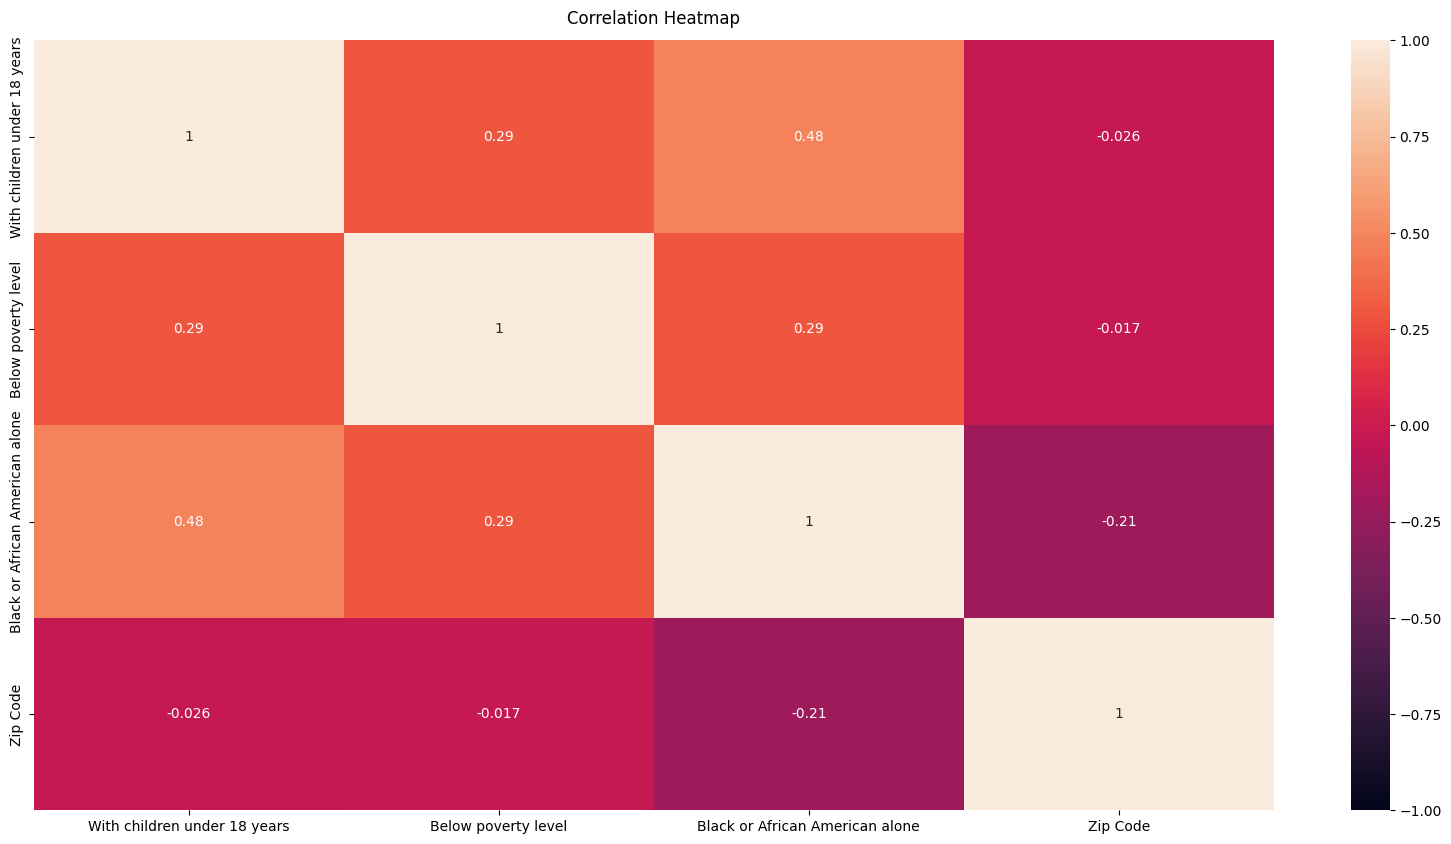

In [39]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);